In [138]:
import pandas as pd 
  
import numpy as np 
from scipy.stats import mode 

class KNN() :  
      
    def __init__( self, K=1 ) : 
          
        self.K = K   
         
    def euclid( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )       
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        self.m, self.n = X_train.shape 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        self.m_test, self.n = X_test.shape 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            neigbr = np.zeros( self.K ) 
              
            neigbr = self.find_neigbr( x ) 
              
            Y_predict[i] = mode( neigbr )[0][0]     
              
        return Y_predict 
        
            
    def find_neigbr( self, x ) : 

          
        euclid_dists = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclid( x, self.X_train[i] ) 
              
            euclid_dists[i] = d 
          
        inds = euclid_dists.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 


In [139]:
import pandas as pd
df = pd.read_csv('sat.trn', sep='\s+',header=None)
feature_cols = list(df.columns) 
feature_cols = feature_cols[0:36]
target = [36]
X_train = df[feature_cols]
y_train = df[target]

In [140]:
df2 = pd.read_csv('sat.tst', sep='\s+',header=None)
feature_cols2 = list(df2.columns) 
feature_cols2 = feature_cols2[0:36]
target2 = [36]
X_test = df2[feature_cols2]
y_test= df2[target2]

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


k_range = list(range(1,8))
weight_options = ["uniform","distance"]
#metric = ["Euclidean"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid,cv=10)
grid.fit(X_train,y_train)


/Users/abhinavsaurabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/abhinavsaurabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/abhinavsaurabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/abhinavsaurabh/opt/anaconda3/lib/python3.8/site-packages/

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [61]:
gs.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [116]:
grid.best_score_

0.8592937180973298

In [117]:
grid.best_estimator_

KNeighborsClassifier(weights='distance')

In [118]:
grid.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [67]:
clf  = KNN( K = 4)
clf.fit(X_train.values, y_train.values)


In [84]:
trainpred = clf.predict(X_train.values)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_train, trainpred))

Accuracy: 0.9395715896279594


In [68]:
predictions = clf.predict(X_test.values)

In [69]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.9025


In [166]:
y_test=y_test.reshape(2000,)

In [171]:
len(X_test)

2000

In [177]:
accuracy_list = []
error_rate = []
error_rate_mse = []
for i in range(1,8):
 
    knn = KNN(K=i)
    knn.fit(X_train.values,y_train.values)
    pred_i = knn.predict(X_test.values)
    #error_rate.append(np.mean(pred_i != y_test))
    #error_rate.append(np.sum(y_test != pred_i) / len(y_test))
    #print(np.unique(pred_i, return_counts=True)) 
    #print(np.unique(y_test, return_counts=True))
    error_rate_mse.append(np.square(np.subtract(y_test, pred_i)).mean())
    error_rate.append(1-(np.sum(y_test == pred_i)/len(y_test)))
    accuracy_list.append(np.sum(y_test == pred_i)/len(y_test))

In [173]:
error_rate


[0.10550000000000004,
 0.11050000000000004,
 0.09650000000000003,
 0.09750000000000003,
 0.09550000000000003,
 0.10199999999999998,
 0.10150000000000003]

In [181]:
accuracy_list

[0.8945, 0.8895, 0.9035, 0.9025, 0.9045, 0.898, 0.8985]

In [178]:
error_rate_mse

[0.692, 0.803, 0.689, 0.732, 0.687, 0.758, 0.7385]

Text(0, 0.5, 'Error Rate')

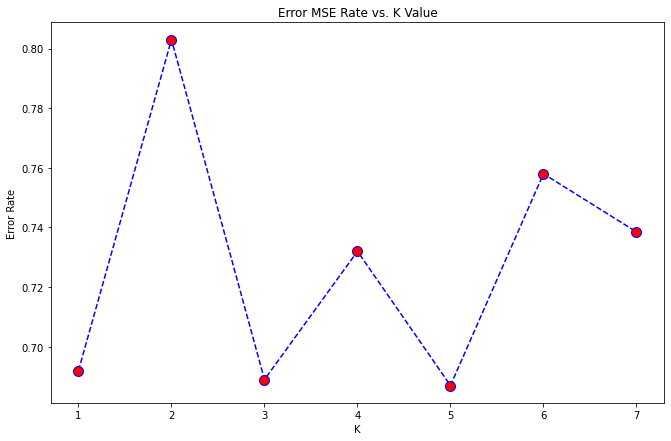

In [184]:
from matplotlib import pyplot as plt
plt.figure(figsize=(11,7))
plt.plot(range(1,8),error_rate_mse,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error MSE Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

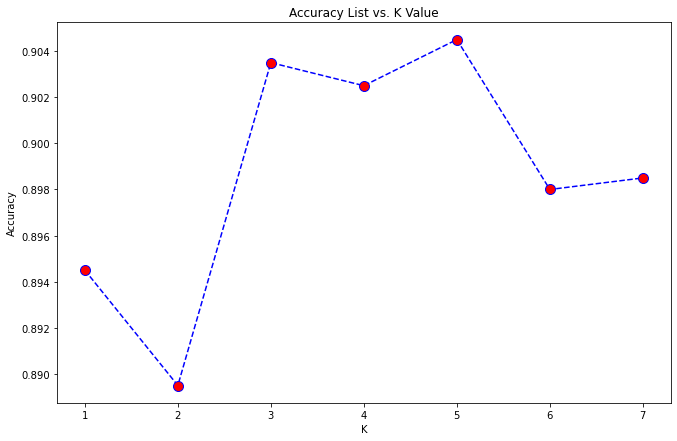

In [186]:
from matplotlib import pyplot as plt
plt.figure(figsize=(11,7))
plt.plot(range(1,8),accuracy_list,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Accuracy List vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')